# Breast Cancer Prediction Using KNN and SVM

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [86]:
df=pd.read_csv("breastCancer.csv")
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Profiling

In [66]:
df.shape

(699, 11)

In [67]:
print(" ** Unique Values Per Columns ** \n")
for i in df.columns[1:]:
    print(i,"=>",df[i].unique())
print("2=benign","4=malignant")


 ** Unique Values Per Columns ** 

clump_thickness => [ 5  3  6  4  8  1  2  7 10  9]
size_uniformity => [ 1  4  8 10  2  3  7  5  6  9]
shape_uniformity => [ 1  4  8 10  2  3  5  6  7  9]
marginal_adhesion => [ 1  5  3  8 10  4  6  2  9  7]
epithelial_size => [ 2  7  3  1  6  4  5  8 10  9]
bare_nucleoli => ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
bland_chromatin => [ 3  9  1  2  4  5  7  8  6 10]
normal_nucleoli => [ 1  2  7  4  5  3 10  6  9  8]
mitoses => [ 1  5  4  2  3  7 10  8  6]
class => [2 4]
2=benign 4=malignant


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Data Preprocissing

In [87]:
# from data profiling we can see "bare_nucleoli" contains "?" hence has object as data type 
#lets take a close look at "bare_nucleoli"
df[df["bare_nucleoli"]=="?"]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [88]:
df["bare_nucleoli"].replace("?",np.nan,inplace=True)

In [70]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [89]:
df["bare_nucleoli"].fillna(str(df["bare_nucleoli"].median()),inplace=True)

In [90]:
## now no column have null values in it
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [91]:
df["bare_nucleoli"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '1.0', '5', '8', '6'],
      dtype=object)

In [92]:
df["bare_nucleoli"] = df["bare_nucleoli"].astype(float)

In [95]:
df["bare_nucleoli"].dtype

dtype('float64')

In [94]:
## we can delete the column "id" as it does not impact result
df.drop("id",axis=1,inplace=True)

### Exploratory Data Analysis


In [40]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


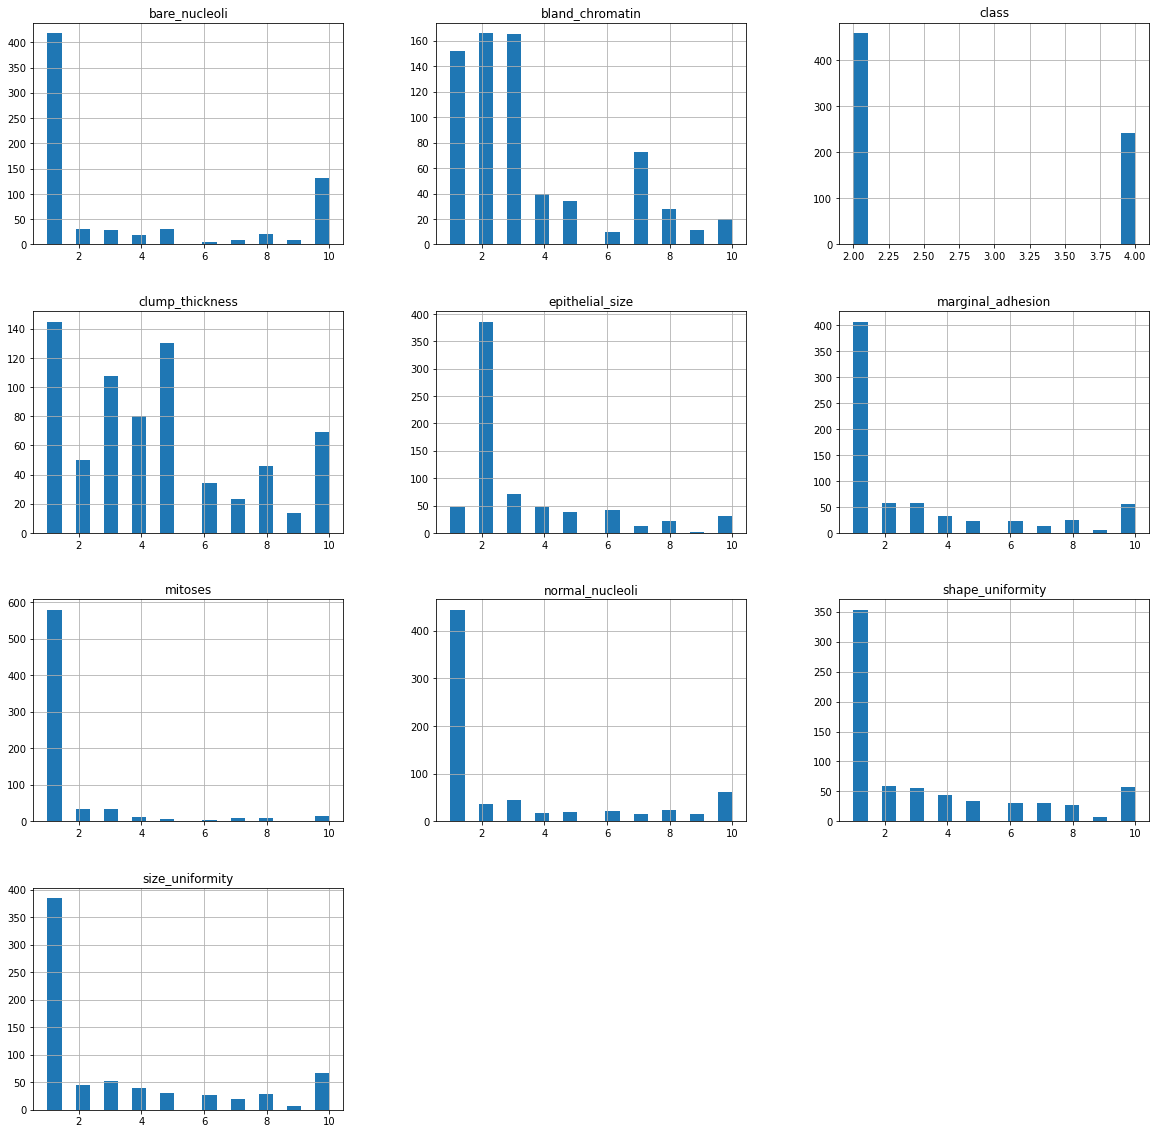

In [103]:
df.hist(bins=20,figsize=(20,20));

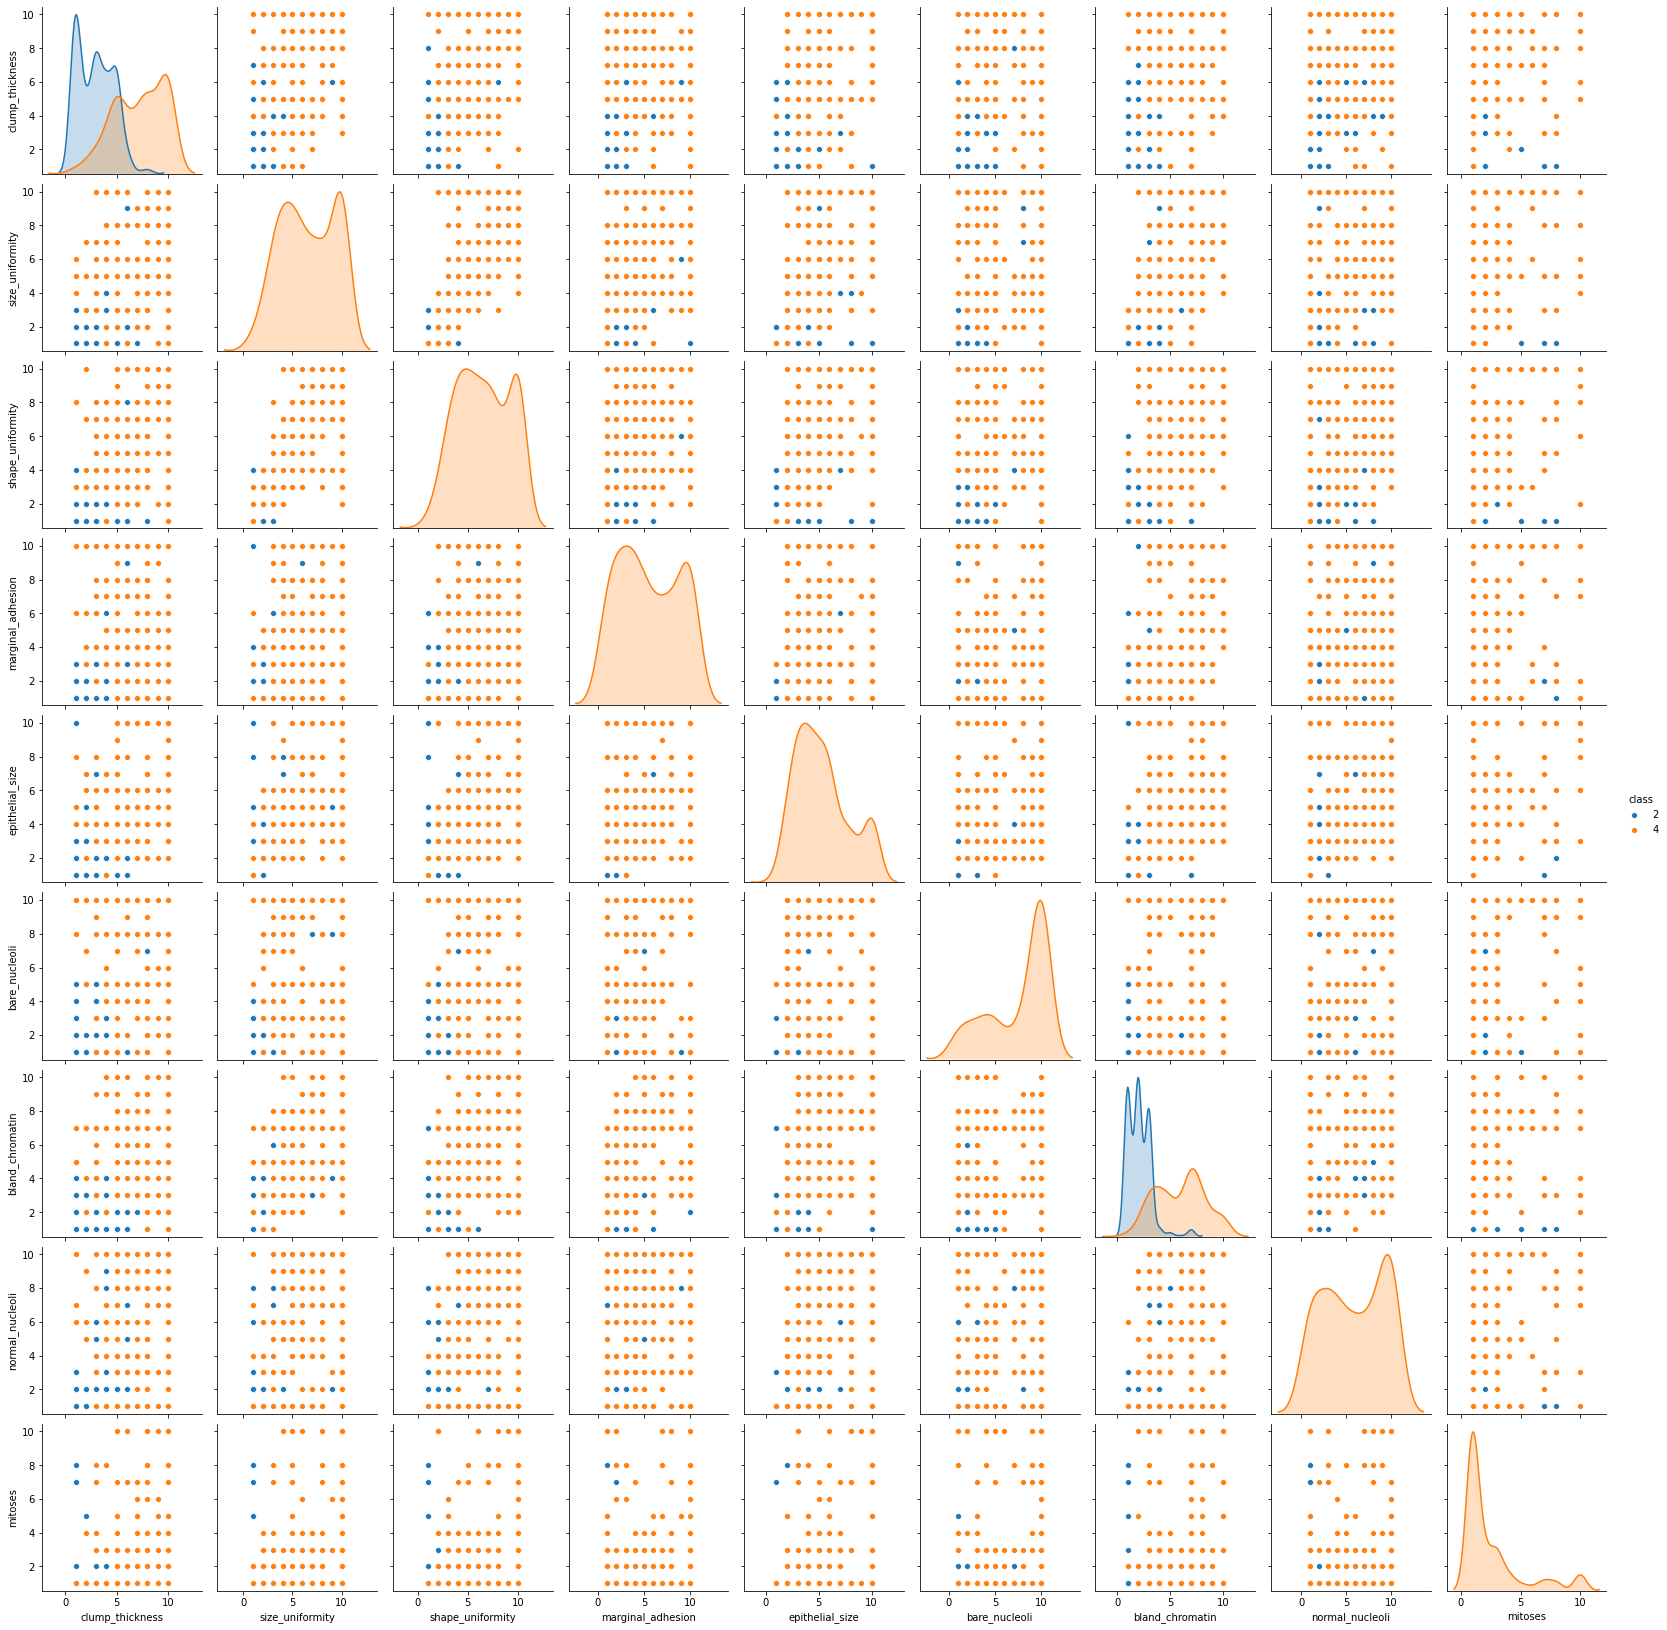

In [105]:
sns.pairplot(df,diag_kind="kde",hue="class")

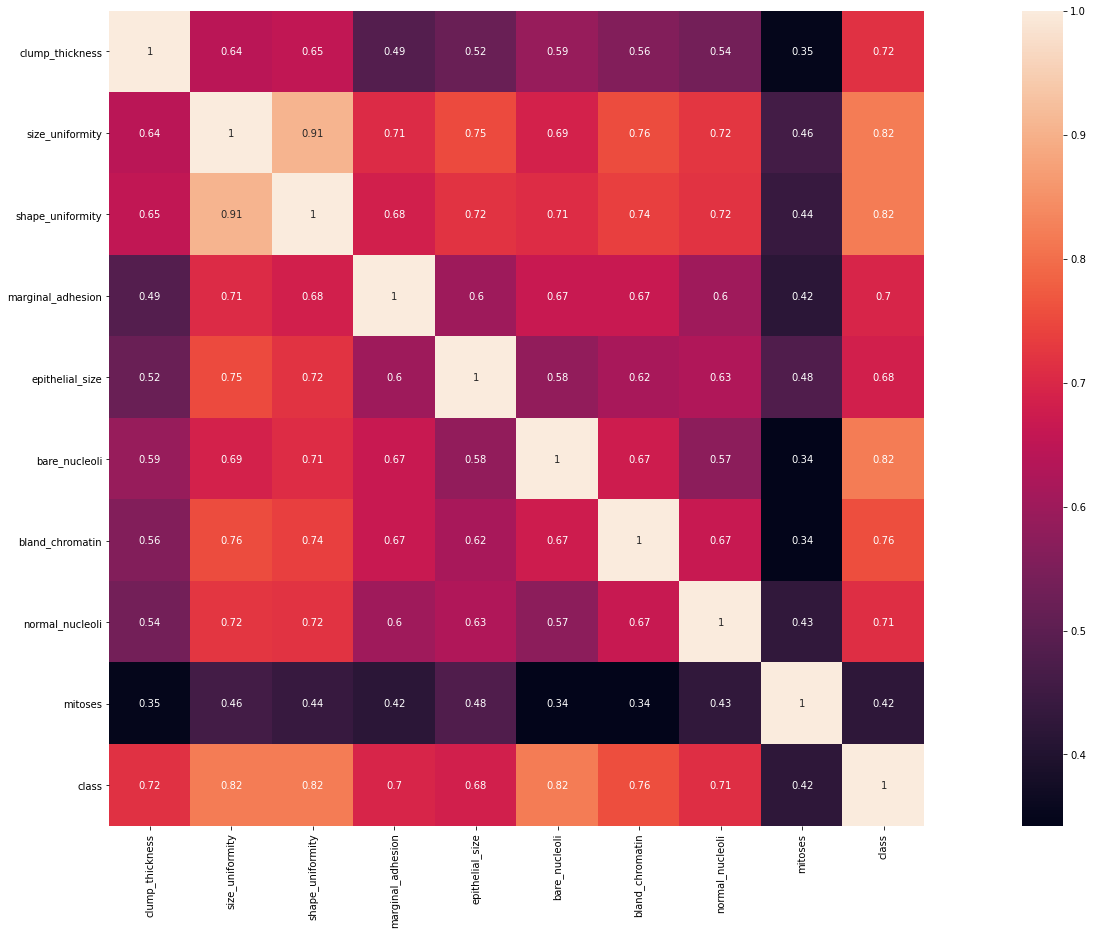

In [115]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),annot=True,square=True)

### Model Building

In [117]:
X=df.drop("class",axis=1)
Y=df["class"]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=.30,random_state=1)

### KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,weights="distance")
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [129]:
KNN_predicted=KNN.predict(X_test)

In [123]:
KNN_Score=KNN.score(X_test,y_test)
KNN_Score

0.9714285714285714

### Support Vector Machine

In [130]:
from sklearn.svm import SVC
SVC=SVC(gamma=0.025,C=3)
SVC.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [134]:
SVC_predicted=SVC.predict(X_test)

In [127]:
SVC_Score=SVC.score(X_test,y_test)
SVC_Score

0.9809523809523809

### Classification Matrix

In [135]:
from sklearn.metrics import classification_report

print("classification_report for KNN")

print("..."*10)

print(classification_report(y_test, KNN_predicted))

classification_report for KNN
..............................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [137]:
from sklearn.metrics import classification_report

print("classification_report for SVC")

print("..."*10)

print(classification_report(y_test, SVC_predicted))

classification_report for SVC
..............................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



### Confusion Matrix

Confusion Matrix For KNeighborsClassifier


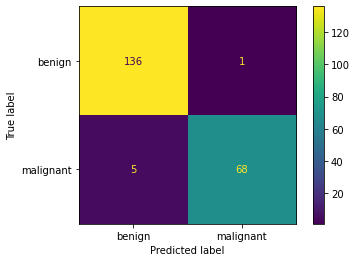

In [156]:
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix For KNeighborsClassifier")
plot_confusion_matrix(KNN,X_test,y_test,display_labels=["benign","malignant"])


Confusion Matrix For SVM


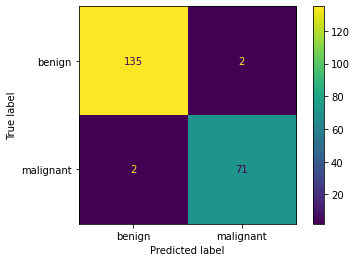

In [157]:
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix For SVM")
plot_confusion_matrix(SVC,X_test,y_test,display_labels=["benign","malignant"])


### Summary

In [164]:
summary=pd.DataFrame({"Accuracy":[KNN_Score,SVC_Score],"Binign_F1Score":[98,99],"Malignant_F1Score":[96,97]},index=["KNN","SVC"])
summary.head().T

,KNN,SVC
Accuracy,0.971429,0.980952
Binign_F1Score,98.000000,99.000000
Malignant_F1Score,96.000000,97.000000
